## Lexy Feldmann<br>Clustering ALS Data

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load in the dataset and create a dataframe variable to store it
als_data = pd.read_csv(r'https://raw.githubusercontent.com/lexyfeldmann/clustering-als-data/refs/heads/main/als_data.csv', sep=',')

# Print the first five rows of data to verify it was loaded properly
als_data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


### 1. Remove any data that is not relevant to the patient’s ALS condition.

In [3]:
# Get rid of ID columns and store the new dataframe back into the same variable
als_data = als_data.drop(['ID', 'SubjectID'], axis=1)

### 2. Apply a standard scalar to the data.

In [4]:
# Create standardscaler object
standard_scaler = StandardScaler()

# Apply the scaler to our ALS dataset and store back in the same variable
als_data = standard_scaler.fit_transform(als_data)

### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [5]:
# Create an empty list variable that will store all the silhouette scores
silhouette_scores = []

# Loop over each number of clusters (range 2 to 10) to see how it performs
for num_clusters in range(2,11):
    
    # Create  k-means model using the specified number of clusters (according to where we are in the loop), store in
    # variable k_means
    k_means = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit the k_means model to the scaled data, which returns an array of labels for each cluster
    labels = k_means.fit_predict(als_data)
    
    # Calculate silhouette score by comparing the input data, our ALS data, and the predicted data (the labels)
    score = silhouette_score(als_data, labels)

    # Add the score to the list variable to have an array of silhouette scores
    silhouette_scores.append(score)

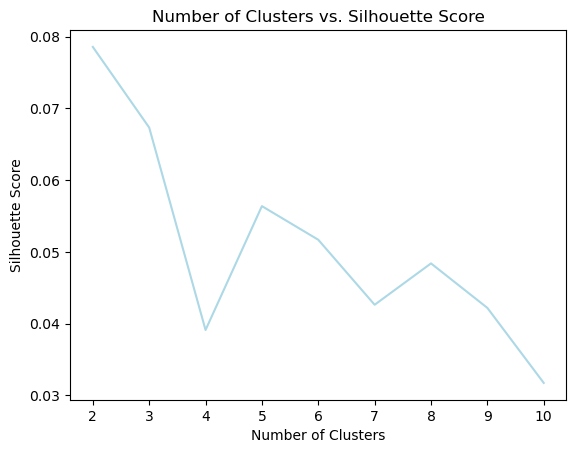

In [6]:
# Plot the silhouette scores and label the x axis with the range used in the loop to grab the scores, set color of line
# to light blue
plt.plot(range(2,11), silhouette_scores, color='lightblue')

# Add a title to the plot
plt.title('Number of Clusters vs. Silhouette Score')

# Add x and y axis labels
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Show the plot without any text output
plt.show()

### 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

The optimal number of clusters for K-means will be two, as it has the highest Silhouette Score at almost 0.08. The lower the silhouette score implies that the data points in the cluster are not distinguisable from that of other clusters. This essentially means that there is no reason to fragment the data any more than just two parts.

### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [7]:
# Create a K-Means model with 2 clusters and store it in a variable called k_means
k_means = KMeans(n_clusters=2, random_state=42)

# Fit the K-Means model to the ALS dataset and store in clusters variable to be used later
clusters = k_means.fit(als_data)

### 6. Fit a PCA transformation with two features to the scaled data.

In [8]:
# Create PCA transformation with two features
pca = PCA(n_components=2)

# Fit the pca variable to the scaled data and store it in a new variable
als_data_pca = pca.fit_transform(als_data)

### 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

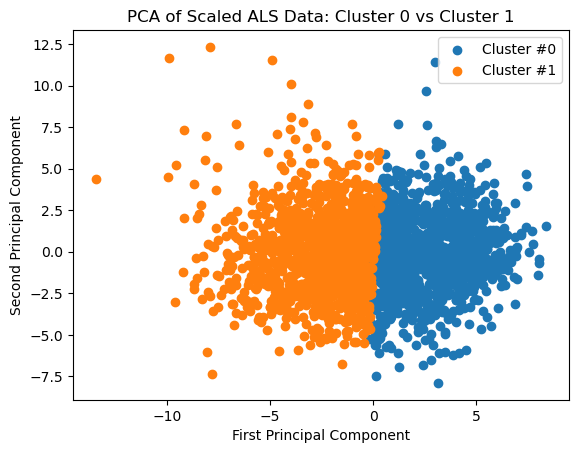

In [9]:
# Get the cluster labels from the data using the K-Means model's predict function and store in labels variable
labels = k_means.predict(als_data)

# Convert the als_data_pca variable to a dataframe, name the columns
pca_df = pd.DataFrame(als_data_pca, columns=['First Component', 'Second Component'])

# Add a new column to the dataset called Cluster, and fill it with the correct labels from before
pca_df['Cluster'] = labels

# Iterate over both clusters in the Cluster column
for cluster in pca_df['Cluster'].unique():
    
    # Create a scatterplot of points for each cluster
    plt.scatter(
        
        # Filter the pca_df dataframe to select rows where the 'Cluster' column matches the current cluster in the loop,
        # and then grab the 'First Component' values (x-coordinates for the current cluster)
        pca_df[pca_df['Cluster'] == cluster]['First Component'],
        
        # Filter the pca_df dataframe to select rows where the 'Cluster' column matches the current cluster in the loop,
        # and then grab the 'Second Component' values (y-coordinates for the current cluster)
        pca_df[pca_df['Cluster'] == cluster]['Second Component'],
        
        # Add a label to each cluster for the legend later on
        label= f'Cluster #{cluster}'
        
    )

# Add a title to the scatterplot
plt.title('PCA of Scaled ALS Data: Cluster 0 vs Cluster 1')

# Add x and y axis labels
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Show the legend on the graph to signify which cluster has what data points
plt.legend()

# Show the plot without any text output
plt.show()

### 8. Summarize your results and make a conclusion.

The clusters seem to be well separated in the plot, with the Cluster 0 values residing on the left side of the graph primarily, and the cluster 1 values residing more on the right. This means that our k-means model effectively grouped our similar data points together! It really does showcase that there are distinct characteristics that differentiate each cluster. The spread of the data also looks like an oval, which means that the principal components are capturing a relationship that is meaningful within the dataset. Overall, the k-means model combined with the PCA transformation have proved to be a good representation of the ALS dataset.